#📌 Extracción

In [7]:
import requests
import pandas as pd

In [8]:
datos_clientes = pd.read_json('/content/TelecomX_Data.json')

In [9]:
datos_clientes

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data.dropna(inplace=True)

#🔧 Transformación

##Utilizando la herramienta de Pandas normalize

In [10]:
df_normalizado = pd.json_normalize(datos_clientes['customer'])
df_normalizado

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3
...,...,...,...,...,...
7262,Female,0,No,No,13
7263,Male,0,Yes,No,22
7264,Male,0,No,No,2
7265,Male,0,Yes,Yes,67


## Revisando los tipos de datos que podemos encontrar en la tabla con .dtypes

In [11]:
# Muestra una lista con todos los nombres de las columnas
print(datos_clientes.columns)

Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')


#Conociendo el diccionario de nuestro dataframe

##Conociendo los tipos de datos que tenemos en nuestro DataFrame

In [12]:
datos_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


##Conociendo los tipos de datos de nuestro DataFrame

In [13]:
datos_clientes.dtypes

,0
customerID,object
Churn,object
customer,object
phone,object
internet,object
account,object


## Podemos ver los nombres de la columna:

In [14]:
datos_clientes.columns

Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')

#Investigando nuestros datos podemos determinar cuales son las columnas mas importantes para este proyecto.

##Vamos a conocer un poco mas de las columnas importantes:




**Columnas de Contrato y Facturación **
Estos atributos muestran la correlación más fuerte con la tasa de cancelación. Los clientes con ciertas características contractuales y de pago son mucho más propensos a irse.

**Contract**: Este es, sin duda, el factor más predictivo. Los clientes con contratos "Mes a mes" (Month-to-month) tienen una tasa de cancelación drásticamente más alta en comparación con los clientes con contratos de "Uno o Dos años" (One year, Two year). Esto sugiere que los clientes con compromisos a corto plazo son más volátiles.

**PaymentMethod**: El método de pago también es un indicador clave. Los clientes que pagan con "Cheque electrónico" (Electronic check) cancelan el servicio con mucha más frecuencia que aquellos que usan métodos automáticos como tarjeta de crédito o transferencia bancaria. Esto podría indicar una menor lealtad o una fricción en el proceso de pago.

**PaperlessBilling**: Si bien no es tan fuerte como los dos anteriores, los datos muestran que los clientes que optan por la facturación sin papel (Yes) tienen una mayor tendencia a cancelar.

In [15]:
account_normalizado = pd.json_normalize(datos_clientes['account'].dropna())
account_normalizado


,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,One year,Yes,Mailed check,65.60,593.3
1,Month-to-month,No,Mailed check,59.90,542.4
2,Month-to-month,Yes,Electronic check,73.90,280.85
3,Month-to-month,Yes,Electronic check,98.00,1237.85
4,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...
7262,One year,No,Mailed check,55.15,742.9
7263,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,Month-to-month,Yes,Mailed check,50.30,92.75
7265,Two year,No,Mailed check,67.85,4627.65


In [16]:
account_normalizado.columns

Index(['Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')

In [17]:
account_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Contract          7267 non-null   object 
 1   PaperlessBilling  7267 non-null   object 
 2   PaymentMethod     7267 non-null   object 
 3   Charges.Monthly   7267 non-null   float64
 4   Charges.Total     7267 non-null   object 
dtypes: float64(1), object(4)
memory usage: 284.0+ KB


In [18]:
account_normalizado.dtypes

,0
Contract,object
PaperlessBilling,object
PaymentMethod,object
Charges.Monthly,float64
Charges.Total,object


In [19]:
# Unique values in one column
unique_contracts = pd.unique(account_normalizado['Contract'])
print(unique_contracts)




['One year' 'Month-to-month' 'Two year']


In [20]:
print(account_normalizado.isnull().sum())


Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64


###Cambiamos el nombre de las columnas que estan mal hechas

In [21]:
account_normalizado = account_normalizado.rename(
    columns={
        "Charges.Monthly": "Monthly Charges",
        "Charges.Total": "Total Charges"
    }
)

account_normalizado

,Contract,PaperlessBilling,PaymentMethod,Monthly Charges,Total Charges
0,One year,Yes,Mailed check,65.60,593.3
1,Month-to-month,No,Mailed check,59.90,542.4
2,Month-to-month,Yes,Electronic check,73.90,280.85
3,Month-to-month,Yes,Electronic check,98.00,1237.85
4,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...
7262,One year,No,Mailed check,55.15,742.9
7263,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,Month-to-month,Yes,Mailed check,50.30,92.75
7265,Two year,No,Mailed check,67.85,4627.65


###Con el codigo a continuacion podemos descubrir que tenemos duplicados en nuestra columna necesaria para el analisis necesario de este caso.

In [22]:
print(account_normalizado.duplicated().sum())

336


In [23]:
clean_account_normalizado = account_normalizado.drop_duplicates()
print(clean_account_normalizado)

            Contract PaperlessBilling     PaymentMethod  Monthly Charges  \
0           One year              Yes      Mailed check            65.60   
1     Month-to-month               No      Mailed check            59.90   
2     Month-to-month              Yes  Electronic check            73.90   
3     Month-to-month              Yes  Electronic check            98.00   
4     Month-to-month              Yes      Mailed check            83.90   
...              ...              ...               ...              ...   
7262        One year               No      Mailed check            55.15   
7263  Month-to-month              Yes  Electronic check            85.10   
7264  Month-to-month              Yes      Mailed check            50.30   
7265        Two year               No      Mailed check            67.85   
7266        Two year               No  Electronic check            59.00   

     Total Charges  
0            593.3  
1            542.4  
2           280.85  
3  

Confirmamos que ya no contamos con los duplicados

In [24]:
print(clean_account_normalizado.duplicated().sum())

0


In [25]:
print(datos_clientes['customerID'].isnull().sum())

0


In [26]:
print(datos_clientes['customerID'].duplicated().sum())

0


In [27]:
datos_clientes['Churn'].isnull().sum()


np.int64(0)

In [28]:
datos_clientes['Churn'].dropna()

,Churn
0,No
1,No
2,Yes
3,Yes
4,Yes
...,...
7262,No
7263,Yes
7264,No
7265,No


### Ahora que los datos están limpios, es momento de crear la columna "Cuentas_Diarias". Utilizare la facturación mensual para calcular el valor diario, proporcionando una visión más detallada del comportamiento de los clientes a lo largo del tiempo.

📌 Esta columna nos ayudará a profundizar en el análisis y a obtener información valiosa para un mejor analisis.

In [29]:
Cuentas_Diarias = clean_account_normalizado['Monthly Charges'] / 30
Cuentas_Diarias

,Monthly Charges
0,2.186667
1,1.996667
2,2.463333
3,3.266667
4,2.796667
...,...
7262,1.838333
7263,2.836667
7264,1.676667
7265,2.261667


### Verificamos una vez mas a ver los tipos de datos que tenemos en nuestro dataframe

In [30]:
clean_account_normalizado.dtypes

,0
Contract,object
PaperlessBilling,object
PaymentMethod,object
Monthly Charges,float64
Total Charges,object


### Arreglamos el tipo de datos para nuestra columna de Total Charges a float64, ya que son valores numericos

In [31]:
# Convierte a float, valores no convertibles se vuelven NaN
clean_account_normalizado['Total Charges'] = pd.to_numeric(clean_account_normalizado['Total Charges'], errors='coerce')

print(clean_account_normalizado.dtypes)

Contract             object
PaperlessBilling     object
PaymentMethod        object
Monthly Charges     float64
Total Charges       float64
dtype: object


/tmp/ipython-input-3686313559.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_account_normalizado['Total Charges'] = pd.to_numeric(clean_account_normalizado['Total Charges'], errors='coerce')


#📊 Carga y análisis

In [32]:
clean_account_normalizado.describe()

,Monthly Charges,Total Charges
count,6931.000000,6920.000000
mean,65.149762,2319.596113
std,30.026306,2266.868666
min,18.250000,18.800000
25%,36.750000,434.725000
50%,70.600000,1426.600000
75%,90.050000,3849.462500
max,118.750000,8684.800000


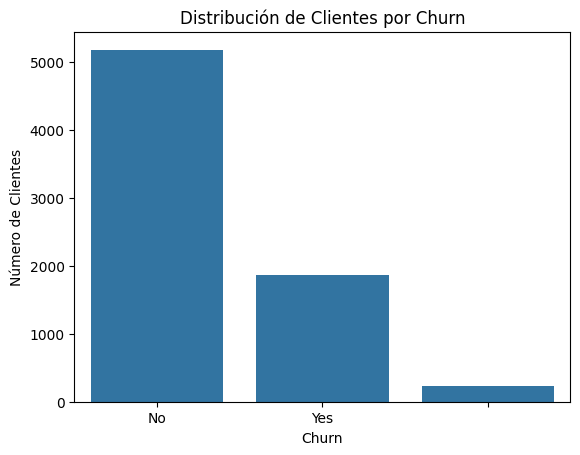

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Churn', data=datos_clientes)
plt.title('Distribución de Clientes por Churn')
plt.xlabel('Churn')
plt.ylabel('Número de Clientes')
plt.show()

##Categorizando genero

In [41]:
datos_clientes['gender'] = datos_clientes['customer'].apply(lambda x: x.get('gender'))
datos_clientes['gender']

,gender
0,Female
1,Male
2,Male
3,Male
4,Female
...,...
7262,Female
7263,Male
7264,Male
7265,Male


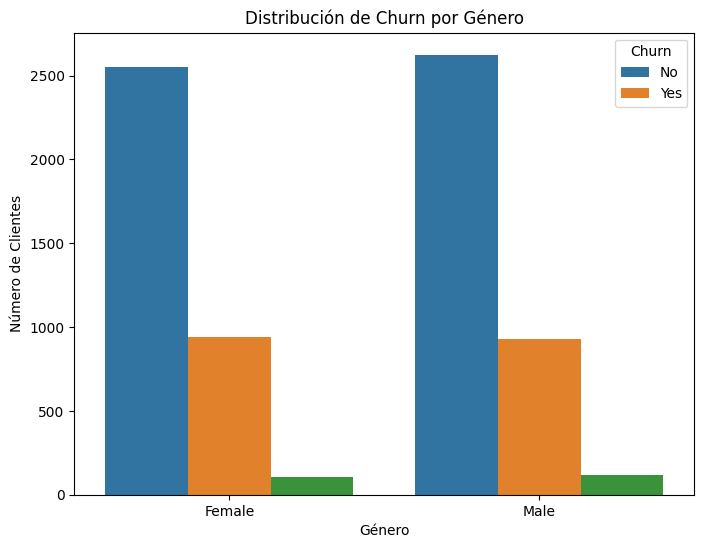

In [45]:

plt.figure(figsize=(8, 6))
sns.countplot(x='gender', hue='Churn', data=datos_clientes)

plt.title('Distribución de Churn por Género')
plt.xlabel('Género')
plt.ylabel('Número de Clientes')
plt.show()

##Categorizando el tipo de contrato

In [65]:
datos_clientes['Contract'] = datos_clientes['account'].apply(lambda x: x.get('Contract'))
datos_clientes['Contract'].head()

,Contract
0,One year
1,Month-to-month
2,Month-to-month
3,Month-to-month
4,Month-to-month


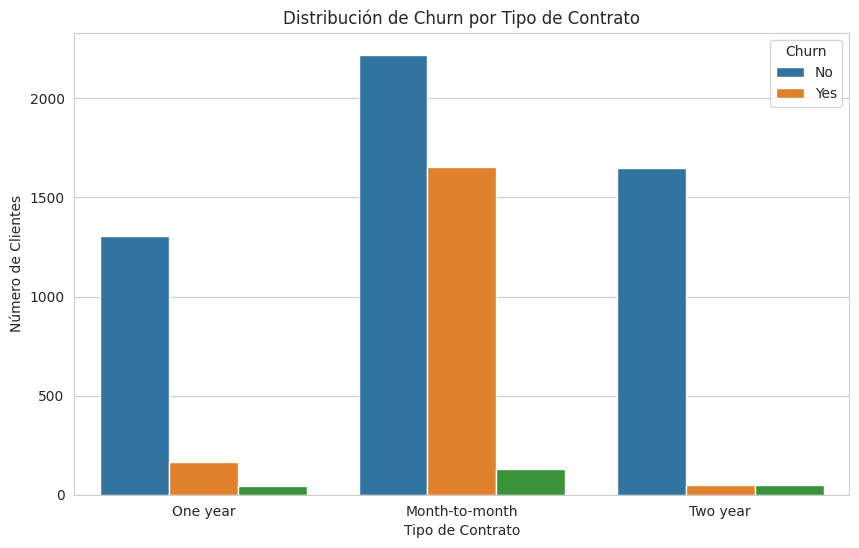

In [68]:

plt.figure(figsize=(10, 6))

sns.countplot(x='Contract', hue='Churn', data=datos_clientes)


plt.title('Distribución de Churn por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Número de Clientes')

plt.show()

In [59]:
datos_clientes['PaymentMethod'] = datos_clientes['account'].apply(lambda x: x.get('PaymentMethod'))
datos_clientes['PaymentMethod'].head()

,PaymentMethod
0,Mailed check
1,Mailed check
2,Electronic check
3,Electronic check
4,Mailed check


##Categorizando método de pago

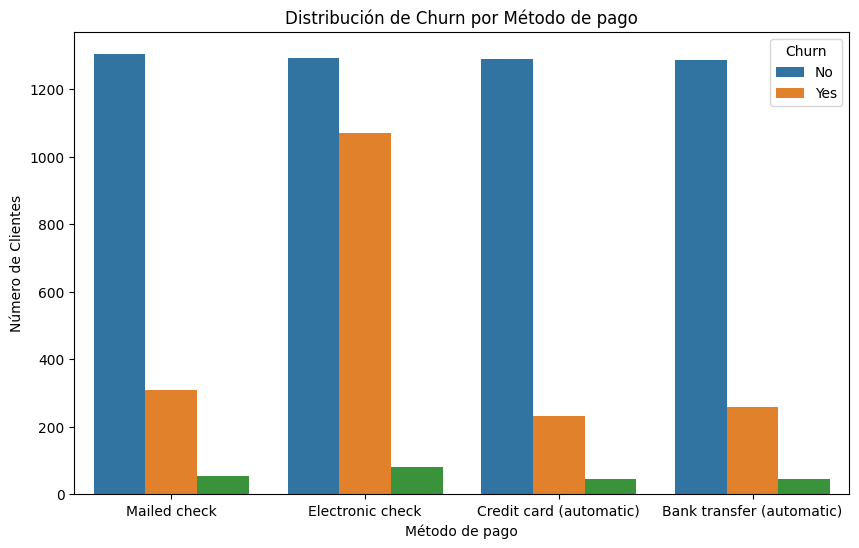

In [60]:

plt.figure(figsize=(10, 6))
sns.countplot(x='PaymentMethod', hue='Churn', data=datos_clientes)

plt.title('Distribución de Churn por Método de pago')
plt.xlabel('Método de pago')
plt.ylabel('Número de Clientes')
plt.show()

#Conteo de evasión por variables numéricas

Explorando el valor numerico de 'Total Charges'

In [90]:
import numpy as np
import pandas as pd

# Extrae la clave 'Charges.Total' de la columna 'account'
datos_clientes['Charges.Total'] = datos_clientes['account'].apply(lambda x: x.get('Charges.Total'))

# Reemplaza los espacios en blanco con NaN para poder convertir a numérico
datos_clientes['Charges.Total'] = datos_clientes['Charges.Total'].replace(' ', np.nan)

# Convierte la columna a tipo numérico (float)
datos_clientes['Charges.Total'] = pd.to_numeric(datos_clientes['Charges.Total'])

# Rellena los valores NaN con 0
datos_clientes['Charges.Total'] = datos_clientes['Charges.Total'].fillna(0)

In [91]:
datos_clientes['Charges.Total']

,Charges.Total
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
7262,0.0
7263,0.0
7264,0.0
7265,0.0


/tmp/ipython-input-3855098901.py:10: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=datos_clientes[datos_clientes['Churn'] == False],
/tmp/ipython-input-3855098901.py:17: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=datos_clientes[datos_clientes['Churn'] == True],


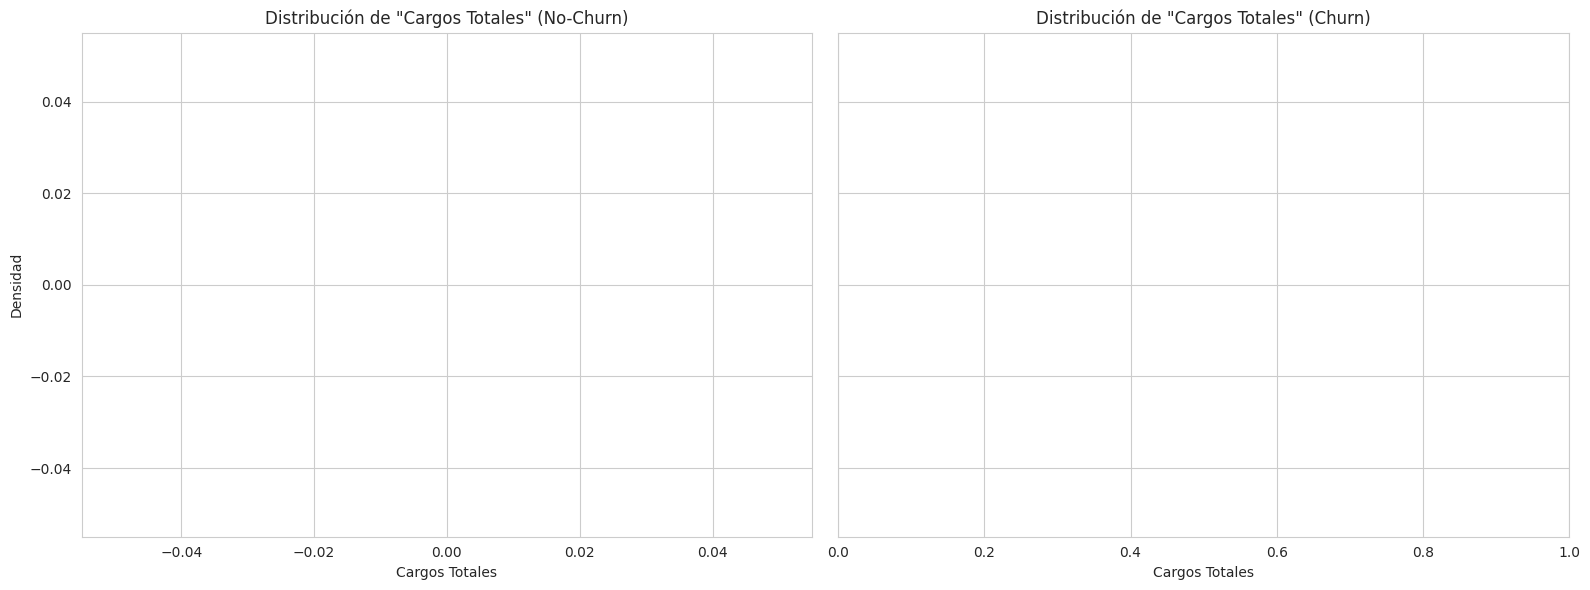

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configura el estilo de los gráficos para una mejor visualización
sns.set_style("whitegrid")

# Crea una figura con dos subplots (uno al lado del otro)
fig, ax = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Gráfico para los clientes que NO tuvieron Churn (se quedaron)
sns.kdeplot(data=datos_clientes[datos_clientes['Churn'] == False],
            x='Total Charges', fill=True, ax=ax[0])
ax[0].set_title('Distribución de "Total Charges" (No-Churn)')
ax[0].set_xlabel('Cargos Totales')
ax[0].set_ylabel('Densidad')

# Gráfico para los clientes que SÍ tuvieron Churn (se fueron)
sns.kdeplot(data=datos_clientes[datos_clientes['Churn'] == True],
            x='Total Charges', fill=True, ax=ax[1], color='orange')
ax[1].set_title('Distribución de "Total Charges" (Churn)')
ax[1].set_xlabel('Cargos Totales')

# Asegura un buen espaciado entre los gráficos
plt.tight_layout()
plt.show()

#📄Informe final